In [1]:
from pyscf import gto, scf
import numpy as np
from jax import numpy as jnp
from matplotlib import pyplot as plt
from ad_afqmc.corr_sample_test import corr_sample
from ad_afqmc import mpi_jax, driver, pyscf_interface, run_afqmc

# Hostname: YICHI
# System Type: Linux
# Machine Type: x86_64
# Processor: x86_64


In [1]:
import os

# Get the number of CPUs available
num_cpus = os.cpu_count()
print(f"Number of CPU cores available: {num_cpus}")

Number of CPU cores available: 12


In [19]:
import importlib
importlib.reload(run_afqmc)
importlib.reload(mpi_jax)

# Hostname: YICHI
# System Type: Linux
# Machine Type: x86_64
# Processor: x86_64


<module 'ad_afqmc.mpi_jax' from '/home/yichi/research/ad_afqmc/ad_afqmc/mpi_jax.py'>

In [18]:
print(run_afqmc.mo_file)

mo_coeff.npz


In [2]:
d1 = 5
atom1 = f'''
H 0 0 0
H {d1} 0 0
'''

mol1 = gto.Mole(
verbose=3,
atom=atom1,
basis='crenbl',
)

mol1.build()
mf1 = scf.RHF(mol1)
mf1.kernel()

d2 = 6
atom2 = f'''
H 0 0 0
H {d2} 0 0
'''

mol2 = gto.Mole(
verbose=3,
atom=atom2,
basis='crenbl',
)

mol2.build()
mf2 = scf.RHF(mol2)
mf2.kernel()

print('the rhf energy difference is: ',mf1.e_tot-mf2.e_tot)

converged SCF energy = -0.763181428226132
converged SCF energy = -0.752803525096631
the rhf energy difference is:  -0.01037790312950082


In [8]:
mo_file1="mo1.npz"
mpi_jax.mo_file = mo_file1

In [9]:
print(mpi_jax.mo_file)

mo1.npz


In [20]:
mo_file1="mo1.npz"
amp_file1="amp1.npz"
chol_file1="chol1"
run_afqmc.mo_file=mo_file1
run_afqmc.amp_file=amp_file1
run_afqmc.chol_file=chol_file1
pyscf_interface.prep_afqmc(mf1,mo_file=mo_file1,chol_file=chol_file1)
options1 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
}
run_afqmc.run_afqmc(options1)

#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 14
#
# Hostname: YICHI
# System Type: Linux
# Machine Type: x86_64
# Processor: x86_64
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -1.073582931e+00     1.27e+00 
#     1      -1.100271702e+00     3.33e+00 
#     2      -1.111707091e+00     4.82e+00 
#     3      -1.104566574e+00     4.92e+00 
#     4      -1.098595977e+00     5.02e+00 
#
# Sampling 

(-1.1060352206141864, 0.0006054589585994999)

In [21]:
print(mpi_jax.mo_file)

mo_coeff.npz


In [ ]:
mo_file2="mo2.npz"
amp_file2="amp2.npz"
chol_file2="chol2"
pyscf_interface.prep_afqmc(mf2,mo_file=mo_file2,chol_file=chol_file2)

In [ ]:
mo_file1="mo1.npz"
amp_file1="amp1.npz"
chol_file1="chol1"
corr_sample.fix_len_chol_prep(mf1,chol_len=17,chol_cut=1e-7,mo_file=mo_file1,chol_file=chol_file1)
mo_file2="mo2.npz"
amp_file2="amp2.npz"
chol_file2="chol2"
corr_sample.fix_len_chol_prep(mf2,chol_len=17,chol_cut=1e-10,mo_file=mo_file2,chol_file=chol_file2)

In [6]:
mo_file1="mo1.npz"
amp_file1="amp1.npz"
chol_file1="chol1"
corr_sample.fix_len_chol_prep(mf1,chol_len=17,chol_cut=1e-7,mo_file=mo_file1,chol_file=chol_file1)
mo_file2="mo2.npz"
amp_file2="amp2.npz"
chol_file2="chol2"
corr_sample.fix_len_chol_prep(mf2,chol_len=17,chol_cut=1e-10,mo_file=mo_file2,chol_file=chol_file2)

# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 17
#
# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 17
#


In [7]:
options1 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
}

options2 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 2,
    "walker_type": "rhf",
    "trial": "rhf",
}

In [13]:
afqmc1 = (mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1))
e_afqmc1, err_afqmc1 = driver.afqmc(*afqmc1)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -7.631814297e-01     2.80e-01 
#     1      -8.596905470e-01     2.16e+00 
#     2      -8.500128984e-01     3.99e+00 
#     3      -8.647252321e-01     4.51e+00 
#     4      -9.272673726e-01     5.00e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -8.658989072e-01                -              6.57e+00 
    20      -8.777760173e-01        1.128268909e-02        8.77e+00 
    40      -8.778325108e-01        6.011873039e-03        1.08e+01 
    60      -8.815155674e-01        5

In [14]:
afqmc2 = (mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2))
e_afqmc2, err_afqmc2 = driver.afqmc(*afqmc2)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -7.528035315e-01     3.95e-01 
#     1      -8.710969090e-01     1.53e+00 
#     2      -8.736531734e-01     2.38e+00 
#     3      -8.765730858e-01     3.14e+00 
#     4      -8.522193432e-01     4.02e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -8.340724111e-01                -              4.21e+00 
    20      -8.732925812e-01        1.405603993e-02        7.22e+00 
    40      -8.737021831e-01        6.303080598e-03        9.81e+00 
    60      -8.748937663e-01        4.

In [16]:
afqmc_en_diff = e_afqmc1 - e_afqmc2
afqmc_en_diff_err = np.sqrt(err_afqmc1**2+err_afqmc2**2)
print(f'the afqmc energy difference is {afqmc_en_diff}, error is {afqmc_en_diff_err}')

the afqmc energy difference is -0.0054958860866555215, error is 0.004066496443225998


In [10]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
weight_cwalker_en1 = [0]*10
weight_cwalker_en2 = [0]*10
cwalker_en_diff = [0]*10
weight_cwalker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,fields = corr_sample.cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = corr_sample.en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = corr_sample.en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_cwalker_en1 = energy_samples1*norm_weight1
    weight_cwalker_en2 = energy_samples2*norm_weight2
    weight_cwalker_en_diff = weight_cwalker_en1 - weight_cwalker_en2
    weight_cwalker_en_diff_err[n] = weight_cwalker_en_diff.std()
    cwalker_en_diff[n] = sum(weight_cwalker_en_diff)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01


In [11]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
#weight_cwalker_en1 = [0]*10
#weight_cwalker_en2 = [0]*10
walker_en_diff = [0]*10
weight_walker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,_,_ = corr_sample.ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = corr_sample.en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = corr_sample.en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_walker_en1 = energy_samples1*norm_weight1
    weight_walker_en2 = energy_samples2*norm_weight2
    weight_walker_en_diff = weight_walker_en1 - weight_walker_en2
    weight_walker_en_diff_err[n] = weight_walker_en_diff.std()
    walker_en_diff[n] = sum(weight_walker_en_diff)

# Number of MPI ranks: 1
#


# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01


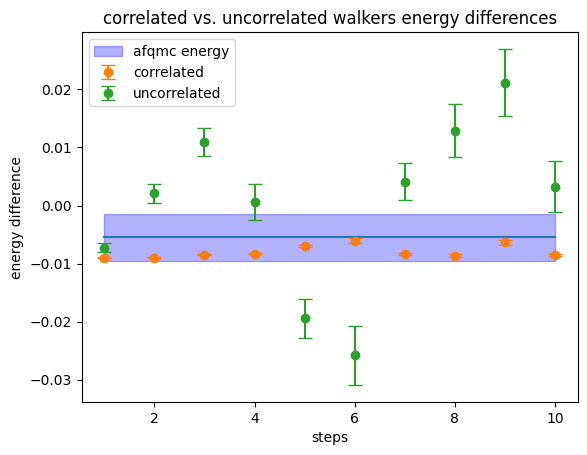

In [17]:
x_steps = np.linspace(1,10,100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc energy')
plt.errorbar(steps+1,cwalker_en_diff,yerr=weight_cwalker_en_diff_err, fmt='o', capsize=5,label='correlated')
plt.errorbar(steps+1,walker_en_diff,yerr=weight_walker_en_diff_err, fmt='o', capsize=5,label='uncorrelated')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated vs. uncorrelated walkers energy differences')
plt.legend()
plt.show()